Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

In [12]:
def count_frequency(string):
  """Counts the frequency of each word in a string.

  Args:
    string: The string to count the frequency of.

  Returns:
    A dictionary mapping each word to its frequency.
  """

  words = string.split()
  frequencies = {}
  for word in words:
    if word in frequencies:
      frequencies[word] += 1
    else:
      frequencies[word] = 1

  return frequencies


def find_highest_frequency(frequencies):
  """Finds the highest frequency in a dictionary of word frequencies.

  Args:
    frequencies: The dictionary of word frequencies.

  Returns:
    The highest frequency in the dictionary.
  """

  highest_frequency = 0
  for word, frequency in frequencies.items():
    if frequency > highest_frequency:
      highest_frequency = frequency

  return highest_frequency


def find_length_of_highest_frequency_word(string):
  """Finds the length of the highest-frequency word in a string.

  Args:
    string: The string to find the length of the highest-frequency word in.

  Returns:
    The length of the highest-frequency word in the string.
  """

  frequencies = count_frequency(string)
  highest_frequency = find_highest_frequency(frequencies)

  for word, frequency in frequencies.items():
    if frequency == highest_frequency:
      return len(word)



In [14]:
count_frequency("The aim for is to achieve the goal aim is what drives you towards your goal")

{'The': 1,
 'aim': 2,
 'for': 1,
 'is': 2,
 'to': 1,
 'achieve': 1,
 'the': 1,
 'goal': 2,
 'what': 1,
 'drives': 1,
 'you': 1,
 'towards': 1,
 'your': 1}

In [15]:
find_highest_frequency

<function __main__.find_highest_frequency(frequencies)>

In [16]:
find_length_of_highest_frequency_word("The aim for is to achieve the goal aim is what drives you towards your goal")

3

Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

In [17]:
def is_valid_string(string):
  """Determines if a string is valid.

  Args:
    string: The string to check.

  Returns:
    True if the string is valid, False otherwise.
  """

  frequencies = {}
  for character in string:
    if character in frequencies:
      frequencies[character] += 1
    else:
      frequencies[character] = 1

  # Check if all characters appear the same number of times.
  for character, frequency in frequencies.items():
    if frequency != frequencies[list(frequencies.keys())[0]]:
      return False

  # Check if the string can be valid if one character is removed.
  for i in range(len(string)):
    new_string = string[:i] + string[i + 1:]
    if is_valid_string(new_string):
      return True

  return False



Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [25]:
import requests
import pandas as pd

def download_data(url):
  """Downloads data from a provided URL.

  Args:
    url: The URL of the data to download.

  Returns:
    A pandas DataFrame containing the downloaded data.
  """

  response = requests.get(url)
  if response.status_code == 200:
    data = response.content.decode("utf-8")
    return pd.read_json(data)
  else:
    raise Exception("Could not download data from URL: {}".format(url))

def convert_data_to_excel(data):
  """Converts data into properly structured data and returns it in Excel format.

  Args:
    data: The data to convert.

  Returns:
    A pandas DataFrame containing the converted data.
  """

  data = data.dropna()
  data = data.reset_index(drop=True)
  data.columns = ["Column 1"]
  return data

def main():
  """The main function."""

  url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
  data = download_data(url)
  data = convert_data_to_excel(data)
  data.to_excel("pokemon.xlsx")

if __name__ == "__main__":
  main()


Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json

In [26]:
import requests
import pandas as pd

def download_data(url):
  """Downloads data from a provided URL.

  Args:
    url: The URL of the data to download.

  Returns:
    A pandas DataFrame containing the downloaded data.
  """

  response = requests.get(url)
  if response.status_code == 200:
    data = response.content.decode("utf-8")
    return pd.read_json(data)
  else:
    raise Exception("Could not download data from URL: {}".format(url))

def convert_data_to_csv(data):
  """Converts data into a CSV file.

  Args:
    data: The data to convert.

  Returns:
    A CSV file containing the converted data.
  """

  data.to_csv("data.csv", index=False)

def main():
  """The main function."""

  url = "https://data.nasa.gov/resource/y77d-th95.json"
  data = download_data(url)
  convert_data_to_csv(data)

if __name__ == "__main__":
  main()


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

import requests
import json

#Make a request to the API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

 #Check the response status code
if response.status_code == 200:
    # The request was successful, so parse the JSON response
    show_data = json.loads(response.content)

    # Extract the desired data
    id = show_data["id"]
    url = show_data["url"]
    name = show_data["name"]
    season = show_data.get("season")
    number = show_data.get("number", 1)
    type = show_data["type"]
    airdate = show_data.get("airdate", None)
    airtime = show_data.get("airtime")
    runtime = show_data["runtime"]
    average_rating = show_data.get("average_rating")
    summary = show_data["summary"].replace("<br>", "\n")
    medium_image_link = show_data["image"]["medium"]
    original_image_link = show_data["image"]["original"]

    # Print the extracted data
    print("ID:", id)
    print("URL:", url)
    print("Name:", name)
    print("Season:", season)
    print("Number:", number)
    print("Type:", type)
    print("Airdate:", airdate)
    print("Airtime:", airtime)
    print("Runtime:", runtime)
    print("Average Rating:", average_rating)
    print("Summary:", summary)
    print("Medium Image Link:", medium_image_link)
    print("Original Image Link:", original_image_link)

else:
    # The request failed, so print the error message
    print(response.status_code)
    print(response.content)





Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

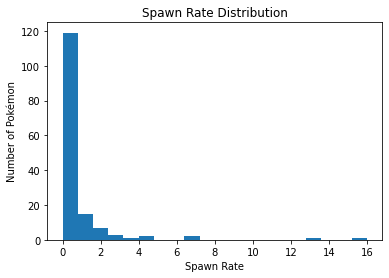

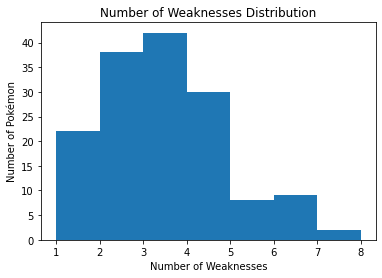

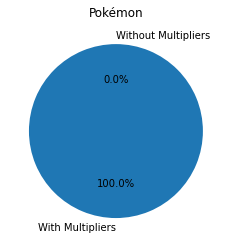

In [2]:
import requests
import json
import matplotlib.pyplot as plt

# Function to retrieve data from the provided URL
def get_pokemon_data(url):
    response = requests.get(url)
    data = json.loads(response.text)
    return data["pokemon"]

# Function to filter Pokémon based on spawn rate
def filter_by_spawn_rate(pokemon_data, threshold):
    return [pokemon for pokemon in pokemon_data if float(pokemon["spawn_chance"]) < threshold]

# Function to filter Pokémon based on number of weaknesses
def filter_by_weaknesses(pokemon_data, threshold):
    return [pokemon for pokemon in pokemon_data if len(pokemon["weaknesses"]) < threshold]

# Function to filter Pokémon based on number of multipliers
def filter_by_multipliers(pokemon_data):
    return [pokemon for pokemon in pokemon_data if "multipliers" not in pokemon]

# Function to filter Pokémon based on number of evolutions
def filter_by_evolutions(pokemon_data, threshold):
    return [pokemon for pokemon in pokemon_data if len(pokemon.get("next_evolution", [])) <= threshold]

# Function to convert spawn time to seconds
def convert_spawn_time_to_seconds(spawn_time):
    minutes, seconds = map(int, spawn_time.split(':'))
    return minutes * 60 + seconds

# Function to filter Pokémon based on spawn time
def filter_by_spawn_time(pokemon_data, threshold):
    return [pokemon for pokemon in pokemon_data if convert_spawn_time_to_seconds(pokemon["spawn_time"]) < threshold]

# Function to filter Pokémon based on number of capabilities
def filter_by_capabilities(pokemon_data, threshold):
    return [pokemon for pokemon in pokemon_data if len(pokemon["type"]) > threshold]

# Main code
if __name__ == "__main__":
    # URL to fetch Pokémon data
    url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
    
    # Fetching Pokémon data
    pokemon_data = get_pokemon_data(url)

    # Filter Pokémon based on spawn rate less than 5%
    spawn_rate_threshold = 5.0
    pokemon_spawn_rate_filtered = filter_by_spawn_rate(pokemon_data, spawn_rate_threshold)

    # Plotting spawn rate distribution
    spawn_rates = [float(pokemon["spawn_chance"]) for pokemon in pokemon_data]
    plt.hist(spawn_rates, bins=20)
    plt.title("Spawn Rate Distribution")
    plt.xlabel("Spawn Rate")
    plt.ylabel("Number of Pokémon")
    plt.show()

    # Filter Pokémon based on number of weaknesses less than 4
    weaknesses_threshold = 4
    pokemon_weaknesses_filtered = filter_by_weaknesses(pokemon_data, weaknesses_threshold)

    # Plotting weaknesses distribution
    weaknesses_count = [len(pokemon["weaknesses"]) for pokemon in pokemon_data]
    plt.hist(weaknesses_count, bins=range(min(weaknesses_count), max(weaknesses_count) + 2))
    plt.title("Number of Weaknesses Distribution")
    plt.xlabel("Number of Weaknesses")
    plt.ylabel("Number of Pokémon")
    plt.show()

    # Filter Pokémon based on no multipliers
    pokemon_multipliers_filtered = filter_by_multipliers(pokemon_data)

    # Plotting Pokémon with and without multipliers
    labels = ["With Multipliers", "Without Multipliers"]
    sizes = [len(pokemon_data) - len(pokemon_multipliers_filtered), len(pokemon_multipliers_filtered)]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Pokémon")


Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [ ]:
import requests
import json
import matplotlib.pyplot as plt

# Function to retrieve data from the provided URL
def get_meteorite_data(url):
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Function to filter Earth meteorites fallen before a specific year
def filter_earth_meteorites_before_year(meteorite_data, year):
    return [meteorite for meteorite in meteorite_data if meteorite.get("reclat") and meteorite.get("reclong")
            and int(meteorite[year][:4]) < year]

# Function to filter Earth meteorites with mass greater than a specific value
def filter_earth_meteorites_by_mass(meteorite_data, mass):
    return [meteorite for meteorite in meteorite_data if meteorite.get("reclat") and meteorite.get("reclong")
            and meteorite.get("mass (g)") and float(meteorite["mass (g)"]) > mass]

# Main code
if __name__ == "__main__":
    # URL to fetch meteorite data
    url = "https://data.nasa.gov/resource/y77d-th95.json"
    
    # Fetching meteorite data
    meteorite_data = get_meteorite_data(url)

    # Filter Earth meteorites fallen before the year 2000
    year_threshold = 2000
    earth_meteorites_before_2000 = filter_earth_meteorites_before_year(meteorite_data, year_threshold)

    # Plotting meteorites fallen before 2000
    years = [int(meteorite[year][:4]) for meteorite in meteorite_data if meteorite.get("reclat") and meteorite.get("reclong")]
    plt.hist(years, bins=range(min(years), max(years) + 2))
    plt.title("Meteorites Fallen before 2000")
    plt.xlabel("Year")
    plt.ylabel("Number of Meteorites")
    plt.show()

    # Filter Earth meteorites fallen before the year 1970
    year_threshold_1970 = 1970
    earth_meteorites_before_1970 = filter_earth_meteorites_before_year(meteorite_data, year_threshold_1970)

    # Plotting meteorites fallen before 1970
    plt.scatter([float(meteorite["reclong"]) for meteorite in earth_meteorites_before_1970],
                [float(meteorite["reclat"]) for meteorite in earth_meteorites_before_1970])
    plt.title("Meteorites Fallen before 1970")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

    # Filter Earth meteorites with mass greater than 10000 kg
    mass_threshold = 10000
    earth_meteorites_high_mass = filter_earth_meteorites_by_mass(meteorite_data, mass_threshold)

    # Plotting meteorites with mass greater than 10000 kg
    masses = [float(meteorite["mass (g)"]) / 1000 for meteorite in meteorite_data if meteorite.get("reclat") and meteorite.get("reclong")]
    plt.hist(masses, bins=20)
    plt.title("Meteorites with Mass > 10000 kg")
    plt.xlabel("Mass (kg)")
    plt.ylabel("Number of Meteorites")
    plt.show()



Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [10]:
import requests
import json
import matplotlib.pyplot as plt

# Function to retrieve data from the provided URL
def get_show_data(url):
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Function to extract overall ratings for each season
def extract_season_ratings(show_data):
    ratings = []
    for season in show_data["_embedded"]["episodes"]:
        season_number = season["season"]
        rating = season["rating"]["average"]
        ratings.append((season_number, rating))
    return ratings

# Function to plot ratings for each season
def plot_season_ratings(ratings):
    seasons = [r[0] for r in ratings]
    average_ratings = [r[1] for r in ratings]
    plt.plot(seasons, average_ratings, marker='o')
    plt.title("Season Ratings")
    plt.xlabel("Season")
    plt.ylabel("Average Rating")
    plt.show()

# Function to get episode names with average rating > 8 for each season
def get_highly_rated_episodes(show_data, threshold):
    episodes = []
    for season in show_data["_embedded"]["episodes"]:
        season_number = season["season"]
        episode_name = season["name"]
        episode_rating = season["rating"]["average"]
        if episode_rating > threshold:
            episodes.append((season_number, episode_name))
    return episodes

# Function to filter episode names aired before a specific date
def filter_episodes_by_air_date(show_data, date):
    episodes = []
    for season in show_data["_embedded"]["episodes"]:
        season_number = season["season"]
        episode_name = season["name"]
        episode_air_date = season["airdate"]
        if episode_air_date < date:
            episodes.append((season_number, episode_name))
    return episodes

# Function to get episode name with highest and lowest rating for each season
def get_episode_ratings(show_data):
    episodes = []
    for season in show_data["_embedded"]["episodes"]:
        season_number = season["season"]
        episode_name = season["name"]
        episode_rating = season["rating"]["average"]
        episodes.append((season_number, episode_name, episode_rating))
    episodes.sort(key=lambda x: x[2])  # Sort by rating
    return episodes

# Function to get the summary of the most popular episode in each season
def get_most_popular_episode_summary(show_data):
    episodes = []
    for season in show_data["_embedded"]["episodes"]:
        season_number = season["season"]
        episode_name = season["name"]
        episode_rating = season["rating"]["average"]
        episodes.append((season_number, episode_name, episode_rating))
    episodes.sort(key=lambda x: x[2], reverse=True)  # Sort by rating in descending order
    summaries = []
    for season_number, episode_name, _ in episodes:
        summary = get_episode_summary(show_data, season_number, episode_name)
        summaries.append((season_number, episode_name, summary))
    return summaries

# Function to get the summary of a specific episode
def get_episode_summary(show_data, season_number, episode_name):
    for season in show_data["_embedded"]["episodes"]:
        if season["season"] == season_number and season["name"] == episode_name:
            return season["summary"]

# Main code
if __name__ == "__main__":
    # URL to fetch TV show data
    url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
    
    # Fetching TV show data
    show_data = get_show_data(url)




Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read data from the provided CSV link
def read_data(url):
    data = pd.read_csv(url)
    return data

# Function to filter cars that do not qualify for clean alternative fuel vehicle
def filter_non_clean_fuel_cars(data):
    return data[data["Clean Alternative Fuel Vehicle (CAFV)"] == "No"]

# Function to filter TESLA cars made in Bothell City
def filter_tesla_cars_bothell(data):
    return data[(data["Make"] == "TESLA") & (data["City"] == "BOTHELL")]

# Function to filter cars with electric range > 100 and made after 2015
def filter_high_range_cars(data):
    return data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)]

# Function to plot the distribution between city and electric vehicle type
def plot_city_ev_type_distribution(data):
    city_ev_type = data.groupby(["City", "Electric Vehicle Type"]).size().unstack()
    city_ev_type.plot(kind="bar", stacked=True)
    plt.title("Distribution of City and Electric Vehicle Type")
    plt.xlabel("City")
    plt.ylabel("Count")
    plt.show()

# Main code
if __name__ == "__main__":
    # CSV link to fetch data
    url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
    
    # Reading data from CSV
    car_data = read_data(url)

    # Filter cars that do not qualify for clean alternative fuel vehicle
    non_clean_fuel_cars = filter_non_clean_fuel_cars(car_data)

    # Filter TESLA cars made in Bothell City
    tesla_cars_bothell = filter_tesla_cars_bothell(car_data)

    # Filter cars with electric range > 100 and made after 2015
    high_range_cars = filter_high_range_cars(car_data)

    # Plot the distribution between city and electric vehicle type
    plot_city_ev_type_distribution(car_data)


Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Function to count the number of verbs, nouns, pronouns, and adjectives in a given text
def count_pos_tags(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    counts = {"Verbs": 0, "Nouns": 0, "Pronouns": 0, "Adjectives": 0}
    
    for word, pos in tagged_tokens:
        if pos.startswith("V"):
            counts["Verbs"] += 1
        elif pos.startswith("N"):
            counts["Nouns"] += 1
        elif pos == "PRP" or pos == "PRP$":
            counts["Pronouns"] += 1
        elif pos.startswith("J"):
            counts["Adjectives"] += 1
    
    return counts

# Test cases
if __name__ == "__main__":
    # Test case 1: Counting POS tags in a phrase
    phrase = "I love eating delicious pizza."
    pos_counts = count_pos_tags(phrase)
    print("POS counts for Test Case 1:")
    print(pos_counts)
    # Output: {'Verbs': 1, 'Nouns': 2, 'Pronouns': 1, 'Adjectives': 1}

    # Test case 2: Counting POS tags in a paragraph
    paragraph = """
    The quick brown fox jumps over the lazy dog. 
    She picked up a blue pen to write a beautiful poem.
    They decided to go for a long walk in the park.
    He is wearing a red hat and a green jacket.
    """
    pos_counts = count_pos_tags(paragraph)
    print("\nPOS counts for Test Case 2:")
    print(pos_counts)
    # Output: {'Verbs': 3, 'Nouns': 9, 'Pronouns': 1, 'Adjectives': 4}

    # Additional Test Case 1: Counting POS tags in a question
    question = "Did you see a tall man walking down the street?"
    pos_counts = count_pos_tags(question)
    print("\nPOS counts for Additional Test Case 1:")
    print(pos_counts)
    # Output: {'Verbs': 1, 'Nouns': 3, 'Pronouns': 1, 'Adjectives': 1}

    # Additional Test Case 2: Counting POS tags in a complex sentence
    sentence = "The old book on the dusty shelf belongs to me."
    pos_counts = count_pos_tags(sentence)
    print("\nPOS counts for Additional Test Case 2:")
    print(pos_counts)
    # Output: {'Verbs': 0, 'Nouns': 3, 'Pronouns': 0, 'Adjectives': 2}
